<a href="https://colab.research.google.com/github/DiasFrazerGroup/Intro-to-Bayesian-Modelling-Course/blob/main/BayesianModellingCourse_FirstStepsWithPyro_VersionWithAnswers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Bayesian Modelling
Jonathan Frazer & Mafalda Dias & Federico Billeci & Charlie Pugh

# **Section 0**

# Probabilistic programming

In the coin flipping example, we could compute everything analytically and that is one of the great advantaged of conjugate priors. In more complex models, we rarely have access to this luxury and we must instead proceed with numerical approaches.

Historically, this was a huge obstacle to the widespread usage of Bayesian statistics. One would have to develop a model, and then, as if that wasn't hard enough, also develop a numerical procedure for performing parameter inference. With the advent of probabilistic programming, the situation changed dramatically. By automating calculations that only a relatively small number of scientists were previously capable of doing, bayesian statistics can now be used by anyone. For more advanced users, probabilistic programming enables fast prototyping -- often the fastest way to a really good model is to quickly explore and reject lots of crap models.

Broadly speaking, probabilistic programming combines techniques from probability theory and programming to make it easier to express and manipulate complex probabilistic models, and then use those models to make predictions, perform statistical analysis, and draw inferences from data. Here we will use Pyro but there are a number of languages, each with different pros and cons. Some other popular ones you might want to consider in the future are Stan, Edward and PyMC. Some of the main advantages of Pyro include

Flexibility: Pyro is designed to be highly flexible, allowing users to define and manipulate a wide range of probabilistic models. It provides a high-level interface for expressing probabilistic models using PyTorch, and this flexibility makes it suitable for a variety of applications, from simple Bayesian models to complex deep probabilistic models. To our knowledge, no other language is this flexible.

Integration with PyTorch: Pyro is built on top of PyTorch, a popular deep learning framework. This integration with PyTorch makes it easy to incorporate neural networks and deep learning models into your probabilistic programs, enabling the creation of hybrid models that combine the strengths of both probabilistic modeling and deep learning.

Scalability: Pyro is designed for both small- and large-scale applications. It supports various inference algorithms, including stochastic variational inference (SVI), which can be used to scale probabilistic models to large datasets and high-dimensional spaces.

Bayesian Deep Learning: Pyro is well-suited for implementing Bayesian deep learning models.

Clear Model Specification: Pyro emphasizes clear separation between model specification and inference algorithms. This separation makes it easier to reason about and debug probabilistic models and inference procedures.

Extensive Library of Distributions: Pyro provides a rich library of probability distributions, making it convenient for users to specify complex models. These distributions can be easily combined to create custom probability distributions for your specific needs.

Community and Ecosystem: Pyro has an active community of users and contributors, and it benefits from the broader ecosystem of PyTorch. This means you can leverage a wealth of resources, including tutorials, documentation, and pre-trained models, for your projects. It also has developers situated at the Broad, so there are lots of examples of its use in biology.

Built-in Support for MCMC: While Pyro primarily focuses on variational inference (which we will go into more depth on in a moment), it also offers support for Markov Chain Monte Carlo (MCMC) methods like NUTS (No-U-Turn Sampler) through integration with the Pyro-MC library. This makes it suitable for a wide range of probabilistic modeling and inference techniques.

Research and Development: Pyro is actively developed and used by researchers in the field of probabilistic programming and Bayesian machine learning. This means it's well-maintained and benefits from ongoing improvements and updates.

Open Source: Pyro is open source and can be freely used and extended by the community, making it accessible for both research and commercial applications.



# An absurdly short introduction to Markov Chain Monte Carlo and Variational Inference

It is beyond the scope of today's course to provide a good introduction to numerical approaches to Bayesian inference. All we want to do at this stage is let you know that broadly speaking there are two strategies, called Markov Chain Monte Carlo (MCMC) and Variational Inference (VI). For now, you can treat these as black box methods for numerically approximating distributions, such as the posterior. Here we just provide mini intros to give you a rough idea of what's going on.

**Markov Chain Monte Carlo (MCMC):**

MCMC is a technique for estimating potentially complex posterior distributions, $P(\theta | X)$, where $\theta$ represents the model parameters, and $X$ is the observed data. As we have seen in the lecture this morning, Bayesian inference aims to compute this posterior distribution. In MCMC, we use a Markov chain (a sequence random events where the probability of each event depends only on the state attained in the previous event) to explore this posterior, via the use of Bayes' rule:

$$P(\theta | X) = \frac{P(X | \theta) \cdot P(\theta)}{P(X)}$$

The basic idea is to build a Markov chain, which is easy to sample from, and whose stationary distribution is our target distribution _i.e._ in the limit of many samples, we obtain samples from the target distribution.

Some key concepts in MCMC:

1. **Metropolis-Hastings Algorithm**:

   - The algorithm starts with an initial guess for the parameter $\theta_0$.
   - It then proposes a new parameter $\theta^*$ based on a proposal distribution $q(\theta^* | \theta_0)$.
   - The acceptance ratio is calculated as:

   $$\alpha = \frac{P(X | \theta^*) \cdot P(\theta^*)}{P(X | \theta_0) \cdot P(\theta_0)}$$

   - If $\alpha \geq 1$, the new state is accepted. If $\alpha < 1$, it is accepted with probability $\alpha$.
   - Repeat this process for many iterations to construct a Markov chain. The chain converges to the target posterior distribution.

2. **Gibbs Sampling**:

   - When dealing with high-dimensional parameter spaces, Gibbs sampling simplifies the process.
   - For a parameter vector $\theta = (\theta_1, \theta_2, \ldots, \theta_k)$, the algorithm samples each parameter in turn from its conditional distribution while holding the others fixed.
   - This conditional sampling is repeated for all parameters, forming a complete iteration.

3. **Convergence and Mixing**:

   - Convergence is assessed using diagnostics like the Gelman-Rubin statistic ($R$-hat) and trace plots.
   - Mixing is the ability of the chain to explore the entire posterior space efficiently.

**Variational Inference (VI):**

VI approximates the posterior distribution $P(\theta | X)$ with a simpler, parameterized distribution $q(\theta)$ chosen from a specific family, often denoted as $q(\theta | \lambda)$, where $\lambda$ represents the distribution's parameters. The key mathematical concepts are as follows:

1. **Variational Family**:

   - Choose a family of distributions for the approximation, e.g., a multivariate Gaussian distribution: $q(\theta | \mu, \Sigma)$.
   - The goal is to find the best parameters $\mu$ and $\Sigma$ that minimize the divergence between $q(\theta)$ and the true posterior $P(\theta | X)$ (the KL-divergence is a measure of similarity between distributions).

2. **Objective Function (ELBO)**:

   - VI formulates an objective function known as the Evidence Lower Bound (ELBO), which bounds the log marginal likelihood ($\log P(X)$):

   $$\text{ELBO} = \mathbb{E}_{q(\theta)}\left[\log P(X, \theta) - \log q(\theta)\right]$$

   - Maximizing the ELBO is equivalent to minimizing the Kullback-Leibler (KL) divergence between $q(\theta)$ and $P(\theta | X)$.

3. **Optimization**:

   - Use optimization algorithms like gradient descent to maximize the ELBO by adjusting the parameters $\mu$ and $\Sigma$.

4. **Scalability**:

   - VI is often preferred for high-dimensional models as it doesn't require sampling and can scale more efficiently than MCMC. It is a central tool in Bayesian deep learning.

5. **Accuracy vs. Speed Trade-off**:

   - VI provides faster approximations but may not be as accurate as MCMC for complex posteriors. The accuracy depends on the chosen variational family and optimization process.

Researchers choose the method that best suits their problem, based on the trade-off between computational efficiency and accuracy. In some cases, people start with VI for fast prototyping, then switch to MCMC to make more accurate models later on in the development process. Careful design of the variational family will get you a long way though and for some models moving to MCMC is unnecessary.


**MCMC with NUTS:**

You will see NUTS used in some of the examples below. As we said above, feel free to just treat this as another black box inference technique for now but if you would like a little more info, then here it is.

MCMC techniques like the Metropolis-Hastings algorithm and Gibbs sampling are effective but have limitations, especially in high-dimensional parameter spaces. The No-U-Turn Sampler (NUTS) is an advanced MCMC algorithm that addresses some of these challenges.

1. **Metropolis-Hastings Revisited**:
   - While the Metropolis-Hastings algorithm is a powerful MCMC method, it requires setting a proposal distribution, which can be challenging, especially in high-dimensional spaces. NUTS improves upon this by automatically determining the step size and direction of the proposal.

2. **Hamiltonian Dynamics**:
   - NUTS leverages the concept of Hamiltonian dynamics from physics. It treats the posterior distribution as a physical system, where the parameter values are positions and their momenta are auxiliary variables.

3. **The No-U-Turn Criterion**:
   - NUTS introduces the "No-U-Turn" criterion to decide when to stop exploring a trajectory in the parameter space. If the algorithm detects that the trajectory starts to fold back on itself, it terminates. This feature improves the exploration of the posterior distribution.

4. **Adaptive Step Size**:
   - NUTS automatically adapts the step size to ensure efficient exploration. This adaptation leads to faster convergence and reduced user intervention in the tuning process.

5. **Efficient Sampling**:
   - NUTS explores the parameter space by extending a trajectory in a way that captures the geometry of the posterior distribution. It efficiently explores the regions of higher probability and avoids regions with low probability.

NUTS has become a popular choice in Bayesian statistics due to its efficiency in exploring complex high-dimensional posteriors. It has greatly improved the performance and user-friendliness of MCMC methods and is often preferred over traditional Metropolis-Hastings for many Bayesian modeling tasks.

[Here is video comparing the efficiency with which a Metropolis-Hastings sampler and a Hamiltonian Monte Carlo  sampler explore complex spaces forming the letters HARLOMSHK](https://www.youtube.com/watch?v=Vv3f0QNWvWQ&ab_channel=DavidDuvenaud)




---



---



# **Section 1**

# First steps with Pyro

Let's install pyro by evaluating the following line of code. Press the play button on the cell below, or equivalently, type ⌘/Ctrl + Enter.

In [1]:
%pip install -q pyro-ppl matplotlib graphviz


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Coin flipping revisited (for the 3rd time!)

We will start by implementing the coin flipping example from the lecture. Since, as we saw, everything can be computed analytically, we can use this example to explore some aspects of building a model in Pyro and then when we perform parameter inference, we can see how it compares to the analytic result.

Import a bunch of libraries

In [2]:
import math
import os
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO
import pyro.distributions as dist
import matplotlib.pyplot as plt

# clear the param store in case we're in a REPL
pyro.clear_param_store()

Next, we will create some mock data.

In [3]:
# create some data with num_tosses tosses of a coin, with bias_factor percentage being heads 
data = []

bias_factor = 0.8
num_tosses = 20

num_heads = int(bias_factor * num_tosses)
num_tails = int((1-bias_factor) * num_tosses)

for _ in range(num_heads):
    data.append(torch.tensor(1.0))
for _ in range(num_tails):
    data.append(torch.tensor(0.0))

### Defining the model

Next we define the model. The generative story is that
* We have a hidden/latent variable, which is the fairness of the coin.
  * Recall from the lecture, we can represent our beliefs and uncertainty about this paramater using the Beta distribution.
* Our observations are either heads or tails, which we represent as Bernoulli random variables, 0 or 1, respectively.
  * We assume that the conditions are not changing from one throw to the next (the iid assumption we discussed in the lecture), hence the fairness parameter is fixed and each throw is independent of the previous throws.

Mathematically, we can write this as
\begin{align}
\lambda \sim& {\rm Beta}(\alpha, \beta) \\
y_{i} \sim& {\rm Bernoulli(\lambda)}
\end{align}
where $i$ labels each throw of the coin and $\alpha$ and $\beta$ are the parameters of the Beta distribution that we choose to reflect our beliefs about the coin, prior to observing any data.

This is what the model looks like in Pyro

In [4]:
# Define the hyperparameters which control the beta prior
alpha0 = torch.tensor(5.0)
beta0 = torch.tensor(5.0)

def model(data):
    # sample f from the Beta prior
    f = pyro.sample("λ", dist.Beta(alpha0, beta0))
    # loop over the observed data
    for i in range(len(data)):
        # observe datapoint i using the bernoulli likelihood
        pyro.sample("y_{}".format(i), dist.Bernoulli(f), obs=data[i])

You may not be familiar with python, or PyTorch, and so the details of each line might be hard to follow but don't worry. The main point to notice at this stage is that this model definition quite closely resembles the mathematical expression for the model above!

Here is what a histogram of samples from the prior looks like.

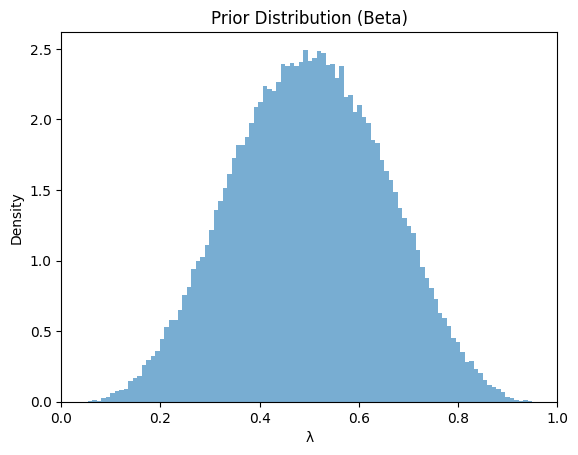

In [5]:
# Reset plotting parameters
plt.rcdefaults()

# Number of samples to draw from the prior
num_samples = 100000

# Sample from the Beta prior
prior_samples = pyro.sample("prior_samples", dist.Beta(alpha0, beta0).expand([num_samples]))

# Create a histogram to visualize the prior distribution
plt.hist(prior_samples, bins=100, density=True, alpha=0.6)
plt.title("Prior Distribution (Beta)")
plt.xlabel("λ")
plt.ylabel("Density")
plt.xlim(0,1)
plt.show()

We can also generate a DAG. This can be a handy way to sanity check your code.

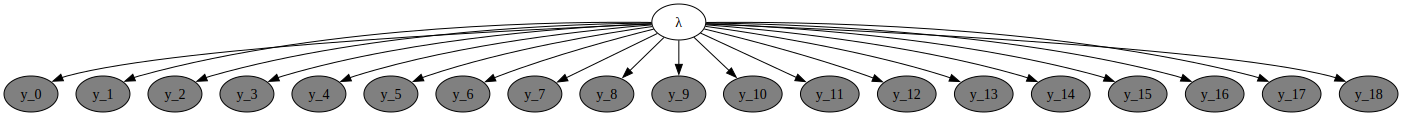

In [6]:
pyro.render_model(model, model_args=(data,))

### Inference

#### Inference with MCMC

In [7]:
from pyro.infer import MCMC, NUTS

Define the NUTS sampler and set up the MCMC inference

In [8]:
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)

`nuts_kernel`: This is the NUTS sampler for MCMC, which is a more efficient sampler for continuous variables.

`num_samples`: The number of MCMC samples to draw.

`warmup_steps`: The number of warm-up steps for the sampler. Warm-up is a process where the sampler adapts its proposal distribution to the posterior.

Run the MCMC sampling:

In [9]:
mcmc.run(data)

Sample: 100%|██████████| 1200/1200 [00:04, 276.45it/s, step size=1.30e+00, acc. prob=0.906]


To access the posterior samples we type the following:


In [10]:
posterior_samples = mcmc.get_samples()

And now we can analyse our result! We will go into this in more detail in later examples but for now let's just make a histogram:

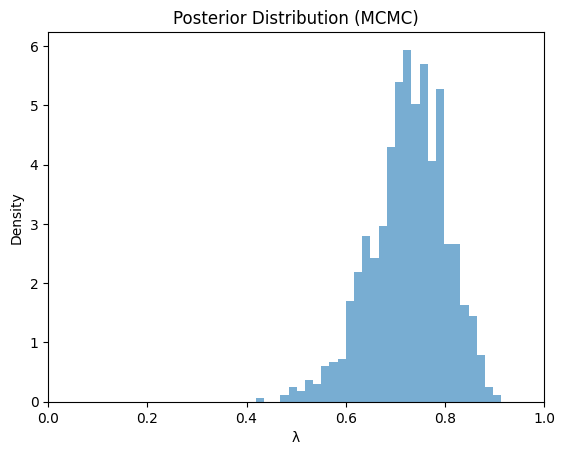

In [11]:
import matplotlib.pyplot as plt

# Reset plotting parameters
plt.rcdefaults()

λ_samples = posterior_samples["λ"]
plt.hist(λ_samples, bins=30, density=True, alpha=0.6)
plt.title("Posterior Distribution (MCMC)")
plt.xlabel("λ")
plt.ylabel("Density")
plt.xlim(0,1)
plt.show()

#### Inference with VI

Now we will repeat this exercise using variational inference instead of VI. The key step is to design a guide. In this example of coin flipping with a $\rm Beta$ _conjugate_ prior, we therefore know that that the posterior is also given by the $\rm Beta$ and hence the optimal choice of guide distribution, is also the $\rm Beta$ distribution, since the goal is to match the posterior as closely as possible. This example is therefore a bit too simple to demonstrate the true power of VI, as the point of VI is to use some simple approximation to a complicated posterior, and not to match it exactly!

In [12]:
def guide(data):
    # register the two variational parameters with Pyro
    # - both parameters will have initial value 15.0.
    # - because we invoke constraints.positive, the optimizer
    # will take gradients on the unconstrained parameters
    # (which are related to the constrained parameters by a log)
    alpha_q = pyro.param("alpha_q", torch.tensor(10.0),
                         constraint=constraints.positive)
    beta_q = pyro.param("beta_q", torch.tensor(10.0),
                        constraint=constraints.positive)
    # sample λ from the distribution Beta(alpha_q, beta_q)
    pyro.sample("λ", dist.Beta(alpha_q, beta_q))

Next, set up the SVI object:

To create an SVI object that will perform stochastic variational inference. You'll need to specify the optimization algorithm (e.g., Adam) and the loss function (ELBO - Evidence Lower Bound).

Breif explanation:

The Adam algorithm: A method used in machine learning to help computers learn faster and better by adjusting how they improve their predictions step by step.
Loss function: A loss function measures how far off a computer’s prediction is from the correct answer, helping it improve with each step.
ELBO (Evidence Lower Bound): ELBO is a way for computers to estimate complex data by balancing between fitting the data well and keeping the solution simple.

In [13]:
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

# setup the optimizer
adam_params = {"lr": 0.05, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)

# setup the inference algorithm
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

In [14]:
# do gradient steps
pyro.clear_param_store()
n_steps = 2000
for step in range(n_steps):
    loss = svi.step(data)
    if step % 10 == 0:
        print('.', end='')

........................................................................................................................................................................................................

Now, instead of getting posterior samples, as in MCMC, what we get are the variational parameters:

In [15]:
# grab the learned variational parameters
alpha_q = pyro.param("alpha_q").item()
beta_q = pyro.param("beta_q").item()

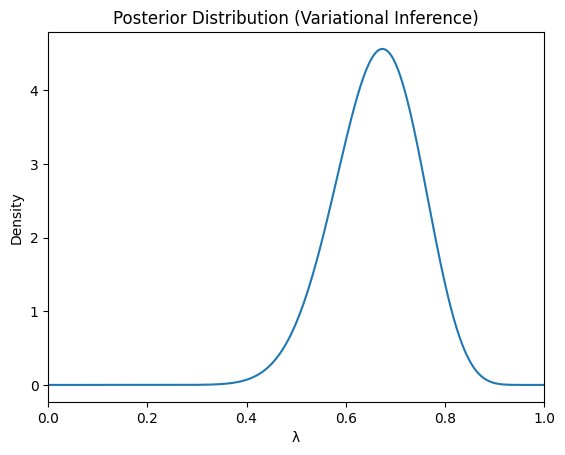

In [16]:
import numpy as np
# Generate a range of values for 'λ'
λ_values = np.linspace(0, 1, 1000)

# Compute the probability density for each value of 'f' based on the variational parameters
pdf_values = [dist.Beta(alpha_q, beta_q).log_prob(torch.tensor(λ)).exp().item() for λ in λ_values]

# Plot the posterior distribution
plt.plot(λ_values, pdf_values)
plt.title("Posterior Distribution (Variational Inference)")
plt.xlabel("λ")
plt.ylabel("Density")
plt.xlim(0,1)
plt.show()

## Exercise 1.1
1. List some considerations for choosing a prior in general.

2. Compare the prior distribution we plotted above to the posterior distributions inferred. Do you notice any differences? If so, what do these reflect?

3. Change the prior hyperparameters in the notebook from the values we defined (`alpha0 = torch.tensor(5.0)`, `beta0 = torch.tensor(5.0)`) and rerun these notebook cells. 
By changing `alpha0` and `beta0`, try to make a prior that reflects the belief that the coin is definitely fair. Try similarly to make a prior that reflects the belief the coin greatly favours one side. Finally try to make a prior that refelects that we have no information about the fairness of the coin. 
How do these changes affect the inferred posterior distributions?

4. Now try changing the simulated coin tosses that we gave as input data. 

## Answers to Exercise 1.1
**1. List as many considerations as possible for choosing a prior.**

**Some possible answers**:  

1. Is the prior mathematically consistant? e.g. In the case of the coin, the parameter must be in the range $[0, 1]$.
2. Does the prior reflect my belief about the system?
  * If we know nothing, what is a sensible choice of uninformative prior?
  * If we know something, what distribution can represent that knowledge?
3. Is the option of a conjugate prior available? Is it flexible enough to meet consideration 2?
4. Is my prior choice a sensible balance between capturing everything I know about the system and being computationally efficient to work with?


**2. Compare the prior distribution we plotted above to the posterior distributions inferred. Do you notice any differences? If so, what do these reflect?**

The posterior distribution is skewed to the right. We saw more heads observed than tails, so change between the posterior and the prior represents our updated belief that the coin is unfair. 


**3. Change the prior hyperparameters in the notebook from the values we defined.**

Hint: try for the respective parts of the questions the following combinations:

alpha beta

500 500

1 100

1 1  

See the below plots for reference. 

Sample: 100%|██████████| 1200/1200 [00:04, 272.49it/s, step size=1.21e+00, acc. prob=0.898]


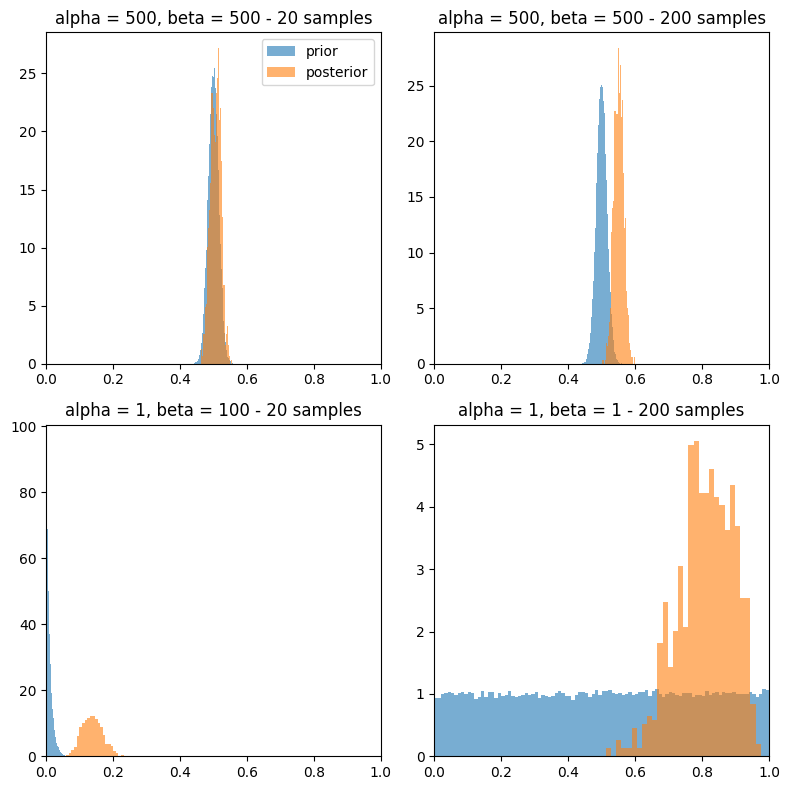

In [17]:
# Plots for Ex 1.1 Q3,4
def run_model_inference(alpha0, beta0, bias_factor, num_tosses, ax):
    
    pyro.clear_param_store()
    def model(data):
        # define the hyperparameters that control the Beta prior
        # sample f from the Beta prior
        λ = pyro.sample("λ", dist.Beta(alpha0, beta0))
        # loop over the observed data
        for i in range(len(data)):
            # observe datapoint i using the bernoulli likelihood
            pyro.sample("y_{}".format(i), dist.Bernoulli(λ), obs=data[i])
    
    
    def guide(data):
        # register the two variational parameters with Pyro
        # - both parameters will have initial value 15.0.
        # - because we invoke constraints.positive, the optimizer
        # will take gradients on the unconstrained parameters
        # (which are related to the constrained parameters by a log)
        alpha_q = pyro.param("alpha_q", torch.tensor(15.0),
                             constraint=constraints.positive)
        beta_q = pyro.param("beta_q", torch.tensor(15.0),
                            constraint=constraints.positive)
        # sample latent_fairness from the distribution Beta(alpha_q, beta_q)
        pyro.sample("λ", dist.Beta(alpha_q, beta_q))


    num_heads = int(bias_factor * num_tosses)
    num_tails = int((1-bias_factor) * num_tosses)
    data = []
    for _ in range(num_heads):
        data.append(torch.tensor(1.0))
    for _ in range(num_tails):
        data.append(torch.tensor(0.0))
    
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)
    posterior_samples = mcmc.get_samples()
    
    # Number of samples to draw from the prior
    num_samples = 100000
    
    # Sample from the Beta prior
    prior_samples = pyro.sample("prior_samples", dist.Beta(alpha0, beta0).expand([num_samples]))
    
    # Create a histogram to visualize the prior distribution
    ax.hist(prior_samples, bins=100, density=True, alpha=0.6, label = 'prior')
    latent_fairness_samples = posterior_samples["λ"]
    ax.hist(latent_fairness_samples, bins=30, density=True, alpha=0.6, label = 'posterior')
    ax.set_xlim(0, 1)

fig, ax = plt.subplots(2, 2, figsize = (8, 8))
ax = ax.flatten()

run_model_inference(torch.tensor(500.0), torch.tensor(500.0),  bias_factor = 0.8, num_tosses = 20, ax = ax[0])
run_model_inference(torch.tensor(500.0), torch.tensor(500.0),  bias_factor = 0.8, num_tosses = 200, ax = ax[1])
run_model_inference(torch.tensor(1.0), torch.tensor(100.0),  bias_factor = 0.8,   num_tosses = 20, ax = ax[2])
run_model_inference(torch.tensor(1.0), torch.tensor(1.0),  bias_factor = 0.8,     num_tosses = 20, ax = ax[3])

ax[0].set_title("alpha = 500, beta = 500 - 20 samples")
ax[1].set_title("alpha = 500, beta = 500 - 200 samples")
ax[2].set_title("alpha = 1, beta = 100 - 20 samples")
ax[3].set_title("alpha = 1, beta = 1 - 200 samples")

ax[0].legend()

fig.tight_layout()

## Summary/key takeaways from Sections 0 and 1

* In practice, most Bayesian modelling requires the use of numerical methods. The conjugate priors we saw in the lecture are the exception not the rule.
* Probabilitic programming enables the inference process to be automated. It provides a flexible framework for building both small models, and big deep learning models.
* We didn't go into any detail but you should be aware that there are two classes of numerical inference techniques; VI and MCMC.
* MCMC is generally more accurate and VI more scalable.



---



---



# **Section 2**

# Experiment Design

In this example, we will explore how Bayesian modelling can be used to design experiments which reduce the number of tests one has to make to make in order to reach a conclusion. This is intimately related to topics such as active learning and is a core concept driving many companies seeking to design new drugs, using a combination of high-throughput experiments and deep learning (see, for instance Daphne Koller's company [Insitro](https://insitro.com/), or the startups some of our friends are involved in [Generate Bbiomedicines](https://generatebiomedicines.com/) and [Dyno Therapeutics](https://www.dynotx.com/)).

These techniques are less common in basic biology. Perhaps your generation of scientists will be the ones to demonstrate the potential of unified approaches to modelling and experimentation.

The main points we want to emphasise are that
* Models can be used to make experiments more efficient and/or cheaper.
* This is a very active area of research with the potential to transform protein design and possibly many other areas of research.

We hope you have fun with the interactive code at the end. If you are too tired to work through this section, feel free to just go through evaluating all the cells and that way you can skip to testing your working memory (which may not be great if you are tired).

### Designing an Adaptive Experiments to Study Your Working Memory

This section is based on [this Pyro tutorial](https://pyro.ai/examples/working_memory.html).

Bayesian Optimal Experimental Design (BOED) seeks to iteratively design experiments such as to maximise the learning efficiency of a model. When using OED, the data generation and modelling works as follows:

1. Write down a Bayesian model involving a design parameter, an unknown latent variable and an observable.

2. Choose the optimal design (more details on this later).

3. Do the experiment based on the output from 2.

4. Collect the results of the experiment done in step 3 and update the model.

5. Repeat steps 2, 3 and 4 until the learning process has converged.


#### The experiment set-up

Suppose you, the participant, are shown a sequence of digits

$$14709$$

which are then hidden. You have to to reproduce the sequence exactly from memory. In the next round, the length of the sequence may be different

$$23465028063035$$

The longest sequence that you can remember is your working memory capacity. In this section, we build a Bayesian model of working memory, and you can then use it to run an adaptive sequence of experiments on yourself to quickly learn your working memory capacity.

#### Warmup: A non-adaptive model of working memory



In [18]:
%pip install -q scipy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import torch
import pyro
import pyro.distributions as dist

Our model for a single round of the digits experiment described above has three components: the length $l$
 of the sequence that the participant has to remember, the participant’s true working memory capacity $\theta$
, and the outcome of the experiment $y$
 which indicates whether they were able to remember the sequence successfully ($y=1$
) or not ($y=0$
). We choose a prior for working memory capacity based on [the (in)famous “The magical number seven, plus or minus two”](https://en.wikipedia.org/wiki/The_Magical_Number_Seven,_Plus_or_Minus_Two).

**Note**: $\theta$
 actually represents the point where the participant has a 50/50 chance of remembering the sequence correctly.

In [20]:
# Here we define the hyperparameters of the prior. 
# This is defining our prior expectation of someones working memory.
sensitivity = 1.0
prior_mean = torch.tensor(7.0)
prior_sd = torch.tensor(3.0)

def model(l):
    # Dimension -1 of `l` represents the number of rounds
    # Other dimensions are batch dimensions: we indicate this with a plate_stack
    with pyro.plate_stack("plate", l.shape[:-1]):
        theta = pyro.sample("theta", dist.Normal(prior_mean, prior_sd))
        # Share theta across the number of rounds of the experiment
        # This represents repeatedly testing the same participant
        theta = theta.unsqueeze(-1)
        # This define a *logistic regression* model for y
        logit_p = sensitivity * (theta - l)
        # The event shape represents responses from the same participant
        y = pyro.sample("y", dist.Bernoulli(logits=logit_p).to_event(1))
        return y

theta values: tensor([[ 6.6520,  5.5338, 10.1509,  6.4778, 11.7950]])


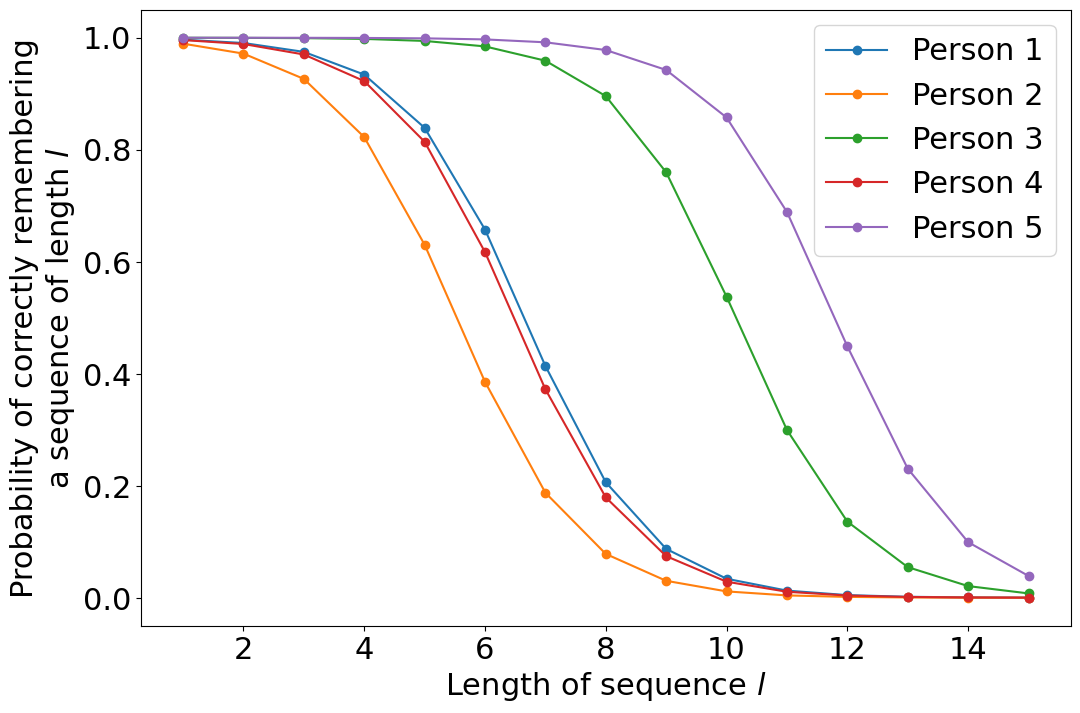

In [21]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

# We sample five times from the prior
theta = (prior_mean + prior_sd * torch.randn((5,1)))
print(f"theta values: {theta.T}")
l = torch.arange(1, 16, dtype=torch.float)
# This is the same as using 'logits=' in the prior above
prob = torch.sigmoid(sensitivity * (theta - l))

plt.figure(figsize=(12, 8))
for curve in torch.unbind(prob, 0):
    plt.plot(l.numpy(), curve.numpy(), marker='o')
plt.xlabel("Length of sequence $l$")
plt.ylabel("Probability of correctly remembering\na sequence of length $l$")
plt.legend(["Person {}".format(i+1) for i in range(5)])
plt.show()

#### Exercise 2.1
1. Can you think of any ways to improve the model?

#### Answers to Exercise 2.1
1. Can you think of any ways to improve the model?

**Some Possible Answers**:
* We could refine the prior in a number of ways. In addition to the discussion above, we might consider things like finding public data of previous experiments, and use that data to build a preliminary model.
* Maybe there is something more to this than simply getting the answer right and wrong. Is there useful information in how wrong the participant is? If they get one digit wrong, or 4, what does that tell us? More generally, we could consider recording additional information apart from length of sequence, and right or wrong answer.

To understand the relationship between $\theta$ and $l$, consider following plots. The probability of successfully remembering the sequence is plotted below, for five random samples of $\theta$.



#### Inference in the model

As in the coin flipping example, let's perform variational inference using VI on some mock data. This time we define a Normal guide for variational inference.

In [22]:
from torch.distributions.constraints import positive

def guide(l):
    # The guide is initialised at the prior:

    # Create a PyTorch tensor named "posterior_mean" and register it as a Pyro parameter.
    # Initialize it with the value from "prior_mean" (which should be defined elsewhere).
    posterior_mean = pyro.param("posterior_mean", prior_mean.clone())

    # Create another PyTorch tensor named "posterior_sd" and register it as a Pyro parameter.
    # Initialize it with the value from "prior_sd" (which should be defined elsewhere).
    # The "constraint=positive" argument ensures that "posterior_sd" remains positive.
    posterior_sd = pyro.param("posterior_sd", prior_sd.clone(), constraint=positive)

    # Sample "theta" from a Normal distribution.
    # The distribution is centered at "posterior_mean" and has a standard deviation of "posterior_sd".
    pyro.sample("theta", dist.Normal(posterior_mean, posterior_sd))

We finally specify the following data: the participant was shown sequences of lengths 5, 7 and 9. They remembered the first two correctly, but not the third one.

In [23]:
l_data = torch.tensor([5., 7., 9.])
y_data = torch.tensor([1., 1., 0.])

We can now run SVI on the model.

In [24]:
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

# Condition the model on observed data 'y_data'
conditioned_model = pyro.condition(model, {"y": y_data})

# Create an instance of SVI
# - `conditioned_model`: The model with observed data
# - `guide`: The guide function, which serves as a variational distribution
# - Adam optimizer with a learning rate of 0.001
# - Use Trace_ELBO as the loss function
# - Perform 100 samples per iteration
svi = SVI(conditioned_model, guide, Adam({"lr": .001}), loss=Trace_ELBO(), num_samples=100)

# Clear the Pyro parameter store to start with a clean slate
pyro.clear_param_store()

# Number of iterations for SVI
num_iters = 5000

# Perform SVI iterations
for i in range(num_iters):
    # Perform one SVI step and calculate the Evidence Lower Bound (ELBO)
    elbo = svi.step(l_data)

    # Print the negative ELBO every 500 iterations (optional)
    if i % 500 == 0:
        print("Neg ELBO:", elbo)

Neg ELBO: 8.221166610717773


/Users/cpugh/git/Intro-to-Bayesian-Modelling-Course/venv/lib/python3.12/site-packages/pyro/infer/svi.py:57: FutureWarning: The `num_samples` argument to SVI is deprecated and will be removed in a future release. Use `pyro.infer.Predictive` class to draw samples from the posterior.
  warnings.warn(


Neg ELBO: 1.254920482635498
Neg ELBO: 3.4066317081451416
Neg ELBO: 1.2078364491462708
Neg ELBO: 1.315035104751587
Neg ELBO: 1.3721010088920593
Neg ELBO: 1.7649924755096436
Neg ELBO: 1.4495205879211426
Neg ELBO: 1.4621053338050842
Neg ELBO: 1.493694245815277


In [25]:
print("Prior:     N({:.3f}, {:.3f})".format(prior_mean, prior_sd))
print("Posterior: N({:.3f}, {:.3f})".format(pyro.param("posterior_mean"),
                                            pyro.param("posterior_sd")))

Prior:     N(7.000, 3.000)
Posterior: N(7.915, 1.408)


So we see that after these three observations, the posterior has deviated from the prior and we now have a sharper estimate of this person's working memory.

#### Bayesian optimal experimental design¶

The problem with above approach is that the experimenter needs to choose the values for $l$. The goal of BOED in this case is to find the best choice of $l$, given the experiments done up to that point.

**WARNING**: This next bit gets quite technical. You might want to go and get a coffee first. Or perhaps leave it for another day and skip to the next subsection [BOED Implementation in Pyro](#BOED-Implementation-in-Pyro).

What do we mean "best choice of $l$"? In this case, we want to find the best estimate for $\theta$ (or equivalently $l$) in the minimum number of experiments. That is we want to maximise the information with each new measurement. We can quantify this with a measure of the "difference" between posterior $p(\theta|y, l)$ and the prior $p(\theta)$ using the Kullback-Leibler divergence, defined as
$$D_{\rm KL}(p(x)||q(x)) = \int p(x)\log\left(\frac{p(x)}{q(x)} \right)dx.$$
This is a special case the more general class of divergences, and is a key quantity in the amazing field of information geometry. This is beyond the scope of today's class though. For the purposes of today, you can think of it as a measure of the difference between the two distributions. So in our case we have
$${\rm IG}(l,y) = KL(p(\theta|y,l)||p(\theta))$$
and with each experiment, we want the posterior to become as different as possible from the prior, as measured by ${\rm IG}(l,y)$.

Unfortunately, we will not know $y$
 until we actually run the experiment. Therefore, the next best option would be to choose $l$
 on the basis of the _expected_ information gain
$${\rm EIG}(l) = \mathbb{E}_{y\sim p(y|\theta, l)}\left [KL(p(\theta|y,l)||p(\theta))\right ]$$
...Unfortunately, this is intractable due to requiring the posterior $p(\theta|y, l)$. [This NeurIPS paper from 2019](https://proceedings.neurips.cc/paper_files/paper/2019/file/d55cbf210f175f4a37916eafe6c04f0d-Paper.pdf) involving a bunch of machine learning rock stars suggests using the following estimator
$${\rm EIG}(l) = \min_q\mathbb{E}_{\theta, y\sim p(\theta)p(y|\theta, l)}\left [\log\left (\frac{p(y|\theta, l)}{q(y|l)}\right)\right].$$



#### BOED Implementation in Pyro
Fortunately, Pyro comes ready with tools to estimate the EIG. All we have to do is define the “marginal guide” $q(y|l)$
 in the formula above.

In [26]:
def marginal_guide(design, observation_labels, target_labels):
    # This shape allows us to learn a different parameter for each candidate design l
    q_logit = pyro.param("q_logit", torch.zeros(design.shape[-2:]))
    pyro.sample("y", dist.Bernoulli(logits=q_logit).to_event(1))

In [27]:
from pyro.contrib.oed.eig import marginal_eig

# The shape of `candidate_designs` is (number designs, 1)
# This represents a batch of candidate designs, each design is for one round of experiment
candidate_designs = torch.arange(1, 15, dtype=torch.float).unsqueeze(-1)
pyro.clear_param_store()
num_steps, start_lr, end_lr = 1000, 0.1, 0.001
optimizer = pyro.optim.ExponentialLR({'optimizer': torch.optim.Adam,
                                      'optim_args': {'lr': start_lr},
                                      'gamma': (end_lr / start_lr) ** (1 / num_steps)})

eig = marginal_eig(model,
                   candidate_designs,       # design, or in this case, tensor of possible designs
                   "y",                     # site label of observations, could be a list
                   "theta",                 # site label of 'targets' (latent variables), could also be list
                   num_samples=100,         # number of samples to draw per step in the expectation
                   num_steps=num_steps,     # number of gradient steps
                   guide=marginal_guide,    # guide q(y)
                   optim=optimizer,         # optimizer with learning rate decay
                   final_num_samples=10000  # at the last step, we draw more samples
                                            # for a more accurate EIG estimate
                  )

We can visualize the EIG estimates that we found, *the expected information gained given experiments with different lengths asked*.

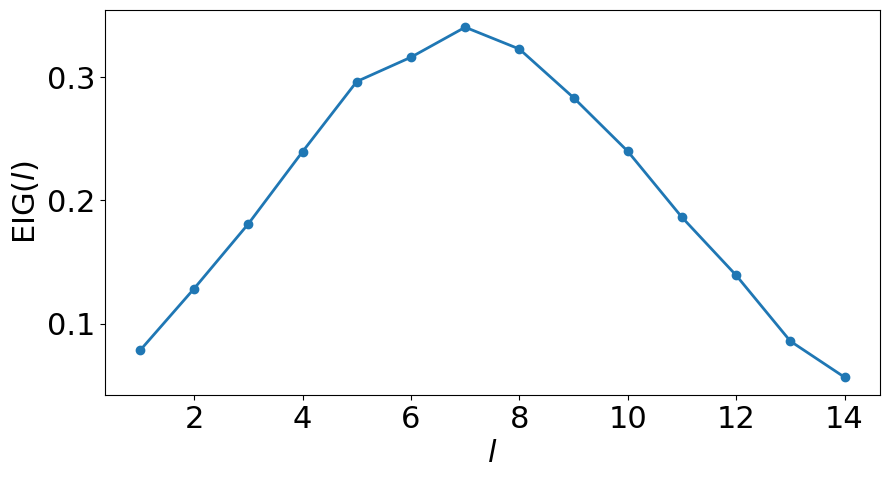

In [28]:
plt.figure(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(candidate_designs.numpy(), eig.detach().numpy(), marker='o', linewidth=2)
plt.xlabel("$l$")
plt.ylabel("EIG($l$)")
plt.show()

In [29]:
best_l = 1 + torch.argmax(eig)
print("Optimal design:", best_l.item())

Optimal design: 7


This tells us that the first round should be run with a sequence of length 7. Note that, while we might have been able to guess this optimal design intuitively, this same framework applies equally well to more sophisticated models and experiments where finding the optimal design by intuition is more challenging.

#### The adaptive experiment

We now have the ingredients to build an adaptive experiment to study working memory.

At the first iteration, step 1 is done using the prior as above. However, for subsequent iterations, we use the posterior given all the data so far.

In this notebook, the “experiment” is performed using the following synthesiser

In [30]:
def synthetic_person(l):
    # The synthetic person can remember any sequence shorter than 6
    # They cannot remember any sequence of length 6 or above
    # (There is no randomness in their responses)
    y = (l < 6.).float()
    return y

In [31]:
def make_model(mean, sd):
    def model(l):
        # Dimension -1 of `l` represents the number of rounds
        # Other dimensions are batch dimensions: we indicate this with a plate_stack
        with pyro.plate_stack("plate", l.shape[:-1]):
            theta = pyro.sample("theta", dist.Normal(mean, sd))
            # Share theta across the number of rounds of the experiment
            # This represents repeatedly testing the same participant
            theta = theta.unsqueeze(-1)
            # This define a *logistic regression* model for y
            logit_p = sensitivity * (theta - l)
            # The event shape represents responses from the same participant
            y = pyro.sample("y", dist.Bernoulli(logits=logit_p).to_event(1))
            return y
    return model

In [32]:
ys = torch.tensor([])
ls = torch.tensor([])
history = [(prior_mean, prior_sd)]
pyro.clear_param_store()
current_model = make_model(prior_mean, prior_sd)

eigs = []
for experiment in range(10):
    print("Round", experiment + 1)

    # Step 1: compute the optimal length
    optimizer = pyro.optim.ExponentialLR({'optimizer': torch.optim.Adam,
                                          'optim_args': {'lr': start_lr},
                                          'gamma': (end_lr / start_lr) ** (1 / num_steps)})
    eig = marginal_eig(current_model, candidate_designs, "y", "theta", num_samples=100,
                       num_steps=num_steps, guide=marginal_guide, optim=optimizer,
                       final_num_samples=10000)
    best_l = 1 + torch.argmax(eig).float().detach()

    eigs.append(eig)

    # Step 2: run the experiment, here using the synthetic person
    print("Asking the participant to remember a sequence of length", int(best_l.item()))
    y = synthetic_person(best_l)
    if y:
        print("Participant remembered correctly")
    else:
        print("Participant could not remember the sequence")
    # Store the sequence length and outcome
    ls = torch.cat([ls, best_l.expand(1)], dim=0)
    ys = torch.cat([ys, y.expand(1)])

    # Step 3: learn the posterior using all data seen so far
    conditioned_model = pyro.condition(model, {"y": ys})
    svi = SVI(conditioned_model,
              guide,
              Adam({"lr": .005}),
              loss=Trace_ELBO(),
              num_samples=100)
    num_iters = 2000
    for i in range(num_iters):
        elbo = svi.step(ls)

    history.append((pyro.param("posterior_mean").detach().clone().numpy(),
                    pyro.param("posterior_sd").detach().clone().numpy()))
    current_model = make_model(pyro.param("posterior_mean").detach().clone(),
                               pyro.param("posterior_sd").detach().clone())
    print("Estimate of \u03b8: {:.3f} \u00b1 {:.3f}\n".format(*history[-1]))

Round 1
Asking the participant to remember a sequence of length 7
Participant could not remember the sequence
Estimate of θ: 5.059 ± 2.100

Round 2
Asking the participant to remember a sequence of length 5
Participant remembered correctly
Estimate of θ: 6.294 ± 1.550

Round 3
Asking the participant to remember a sequence of length 6
Participant could not remember the sequence
Estimate of θ: 5.295 ± 1.291

Round 4
Asking the participant to remember a sequence of length 5
Participant remembered correctly
Estimate of θ: 5.933 ± 1.077

Round 5
Asking the participant to remember a sequence of length 6
Participant could not remember the sequence
Estimate of θ: 5.412 ± 1.034

Round 6
Asking the participant to remember a sequence of length 5
Participant remembered correctly
Estimate of θ: 5.688 ± 0.924

Round 7
Asking the participant to remember a sequence of length 5
Participant remembered correctly
Estimate of θ: 5.978 ± 0.743

Round 8
Asking the participant to remember a sequence of length 

Now let’s visualize the evolution of the posterior for $\theta$ (Blue = prior, light green = 10 step posterior):

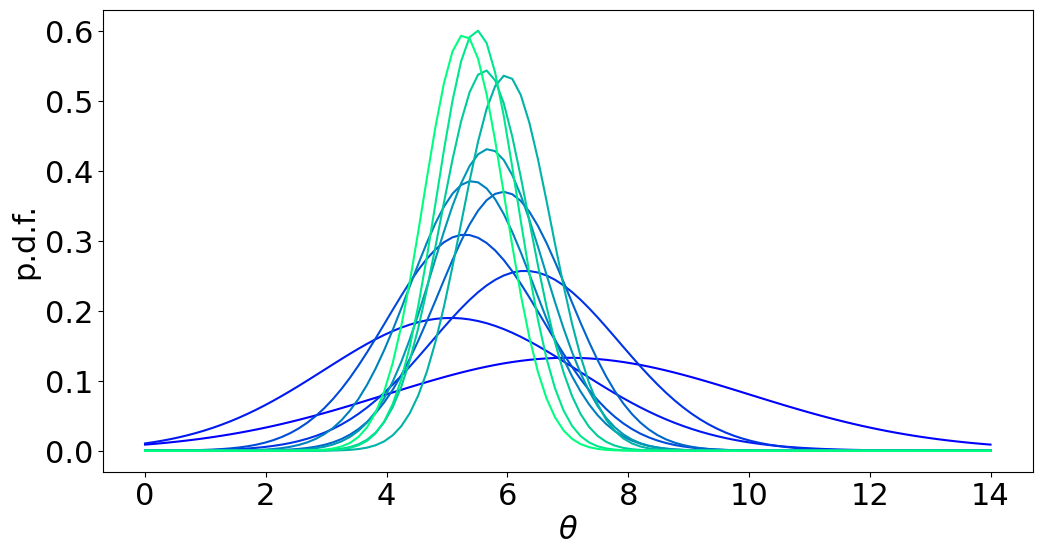

In [33]:
import numpy as np
from scipy.stats import norm
import matplotlib.colors as colors
import matplotlib.cm as cmx


matplotlib.rcParams.update({'font.size': 22})
cmap = plt.get_cmap('winter')
cNorm  = colors.Normalize(vmin=0, vmax=len(history)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plt.figure(figsize=(12, 6))
x = np.linspace(0, 14, 100)
for idx, (mean, sd) in enumerate(history):
    color = scalarMap.to_rgba(idx)
    y = norm.pdf(x, mean, sd)
    plt.plot(x, y, color=color)
    plt.xlabel("$\\theta$")
    plt.ylabel("p.d.f.")
plt.show()

And lets look at the EIG (expected information gain) of each of the 10 experiments

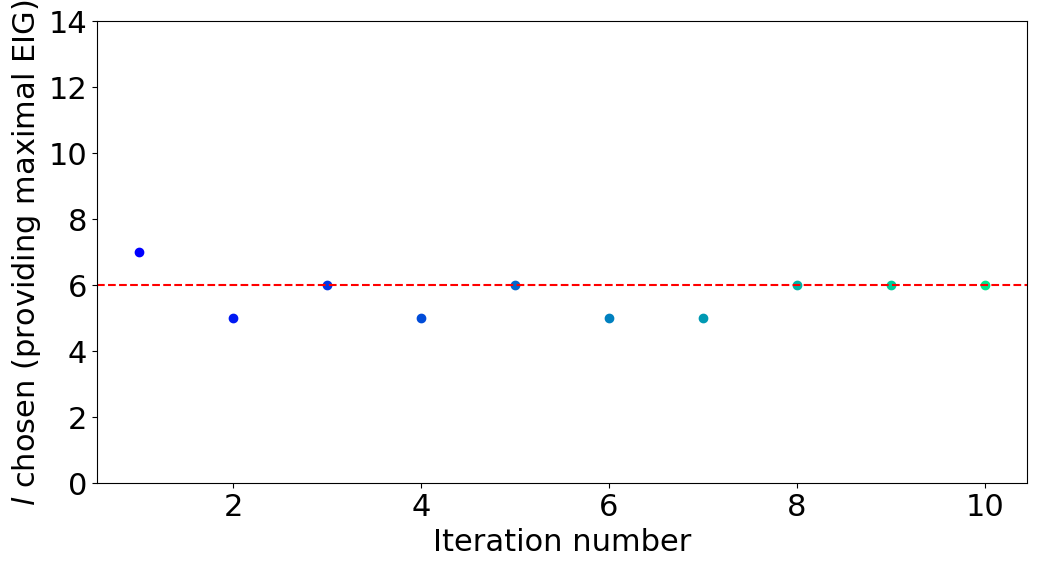

In [34]:
matplotlib.rcParams.update({'font.size': 22})
cmap = plt.get_cmap('winter')
cNorm  = colors.Normalize(vmin=0, vmax=len(history)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plt.figure(figsize=(12, 6))

for idx, eig in enumerate(eigs):
    color = scalarMap.to_rgba(idx)
    l_chosen = eig.argmax().item() + 1
    plt.scatter(idx+1, l_chosen, color=color)
    plt.ylabel("$l$ chosen (providing maximal EIG)")
    plt.xlabel("Iteration number")

plt.axhline(6, linestyle='--', color='red')
plt.ylim(0,14)
plt.show()

By contrast, suppose we use a simplistic design: try sequences of lengths 1, 2, …, 10.

In [35]:
pyro.clear_param_store()
ls = torch.arange(1, 11, dtype=torch.float)
ys = synthetic_person(ls)
conditioned_model = pyro.condition(model, {"y": ys})
svi = SVI(conditioned_model,
          guide,
          Adam({"lr": .005}),
          loss=Trace_ELBO(),
          )
num_iters = 2000
for i in range(num_iters):
    elbo = svi.step(ls)

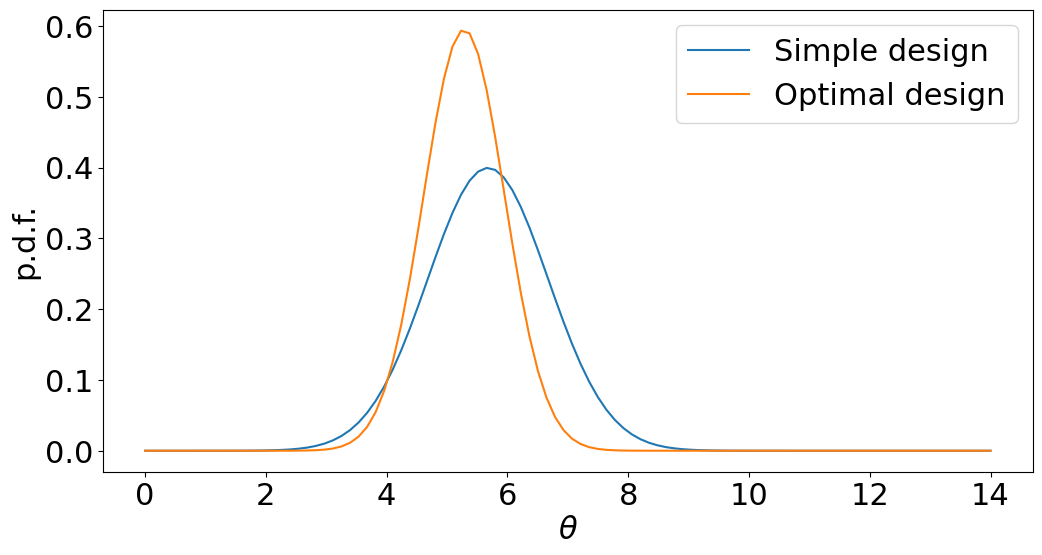

In [36]:
plt.figure(figsize=(12,6))
matplotlib.rcParams.update({'font.size': 22})
y1 = norm.pdf(x, pyro.param("posterior_mean").detach().numpy(),
              pyro.param("posterior_sd").detach().numpy())
y2 = norm.pdf(x, history[-1][0], history[-1][1])
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Simple design", "Optimal design"])
plt.xlabel("$\\theta$")
plt.ylabel("p.d.f.")
plt.show()

Although both design strategies give us data, the optimal strategy ends up with a posterior distribution that is more peaked: that means we have greater confidence in our final answer, or may be able to stop experimenting earlier.

#### Exercise 2.2
1. Test your working memory by using the following code.



2. Change the values below defining the prior expectation of the working memory of the population, `prior_mean = torch.tensor(7.0)`, `prior_sd = torch.tensor(3.0)`. Observe how this changes the behavior of the next chosen length based on EIG (expected information gain). Try making very good or very bad guesses to make the effects more apparent. 


**Notes**:
* Running this requires first evaluating the cells above in this section.
* Keep the values reasonable (roughly less than 20 greater than 0) for numerical reasons. 
* To simplify things, the maximum possible value we have hardcoded is 14. You may notice this in the behaviour of the predictions. 
* You can try to cheat!

The code below is the same as above except for small modifications to enable the synthetic_person to be replaced by a real person.

In [37]:
# This is defining our prior expectation of someones working memory. Note it modelled as Gaussian.

# This is the mean of the 'working memory' across people
prior_mean = torch.tensor(7.0)

# This is the standard devation
prior_sd = torch.tensor(3.0)

In [38]:
import time
from IPython.display import display, update_display, HTML
import torch

def generate_random_integer(length):
    if length <= 0:
        raise ValueError("Length must be greater than 0")

    # Define the range for the random integer
    lower_bound = 10 ** (length - 1)
    upper_bound = 10 ** length - 1

    # Sample a random integer within the specified range
    random_int = torch.randint(lower_bound, upper_bound + 1, (1,))

    return random_int.item()

def show_number_for_time_jupyter(number, display_time):
    # Display the number without quotes
    display(HTML(f"Remember this number: {number}"), display_id='a')
    
    # Pause for the specified time (in seconds)
    time.sleep(display_time)

    # Overwrite the number to "erase" it, again without quotes
    update_display(HTML(f"Remember this number: {''.join(['*']*len(str(number)))}"), display_id='a')  

def ask_user_for_number_jupyter():
    # Ask the user what the number was
    return input("What was the number? ")

def number_quiz(number_to_show, display_time=7):
    # Show the number and then hide it
    show_number_for_time_jupyter(number_to_show, display_time)
    # Ask the user and check their answer
    user_guess = ask_user_for_number_jupyter()
    return str(user_guess) == str(number_to_show)

In [39]:
ys = torch.tensor([])
ls = torch.tensor([])
history = [(prior_mean, prior_sd)]
pyro.clear_param_store()
current_model = make_model(prior_mean, prior_sd)

eigs = []
for experiment in range(10):
    print("Round", experiment + 1)

    # Step 1: compute the optimal length
    optimizer = pyro.optim.ExponentialLR({'optimizer': torch.optim.Adam,
                                          'optim_args': {'lr': start_lr},
                                          'gamma': (end_lr / start_lr) ** (1 / num_steps)})
    eig = marginal_eig(current_model, candidate_designs, "y", "theta", num_samples=100,
                       num_steps=num_steps, guide=marginal_guide, optim=optimizer,
                       final_num_samples=10000)
    best_l = 1 + torch.argmax(eig).float().detach()

    eigs.append(eig)

    # Step 2: run the experiment, using user input
    # Generate random integer of best length to maximise expected information gain 
    random_integer = generate_random_integer(int(best_l.item()))
    # Test user
    quiz_result = number_quiz(random_integer)
    
    y = torch.tensor([float(quiz_result)])
    if y:
        print("Participant remembered correctly")
    else:
        print("Participant could not remember the sequence")
    # Store the sequence length and outcome
    ls = torch.cat([ls, best_l.expand(1)], dim=0)
    ys = torch.cat([ys, y.expand(1)])

    # Step 3: learn the posterior using all data seen so far
    conditioned_model = pyro.condition(model, {"y": ys})
    svi = SVI(conditioned_model,
              guide,
              Adam({"lr": .005}),
              loss=Trace_ELBO(),
              num_samples=100)
    num_iters = 2000
    for i in range(num_iters):
        elbo = svi.step(ls)

    history.append((pyro.param("posterior_mean").detach().clone().numpy(),
                    pyro.param("posterior_sd").detach().clone().numpy()))
    current_model = make_model(pyro.param("posterior_mean").detach().clone(),
                               pyro.param("posterior_sd").detach().clone())
    print("Estimate of \u03b8: {:.3f} \u00b1 {:.3f}\n".format(*history[-1]))

Round 1


Participant remembered correctly


/Users/cpugh/git/Intro-to-Bayesian-Modelling-Course/venv/lib/python3.12/site-packages/pyro/infer/svi.py:57: FutureWarning: The `num_samples` argument to SVI is deprecated and will be removed in a future release. Use `pyro.infer.Predictive` class to draw samples from the posterior.
  warnings.warn(


Estimate of θ: 8.943 ± 2.091

Round 2


Participant could not remember the sequence
Estimate of θ: 7.784 ± 1.578

Round 3


Participant could not remember the sequence
Estimate of θ: 6.869 ± 1.310

Round 4


Participant remembered correctly
Estimate of θ: 7.363 ± 1.005

Round 5


Participant remembered correctly
Estimate of θ: 7.812 ± 0.982

Round 6


Participant remembered correctly
Estimate of θ: 8.262 ± 0.884

Round 7


Participant remembered correctly
Estimate of θ: 8.612 ± 0.846

Round 8


Participant could not remember the sequence
Estimate of θ: 8.403 ± 0.803

Round 9


Participant remembered correctly
Estimate of θ: 8.568 ± 0.762

Round 10


Participant could not remember the sequence
Estimate of θ: 8.384 ± 0.655



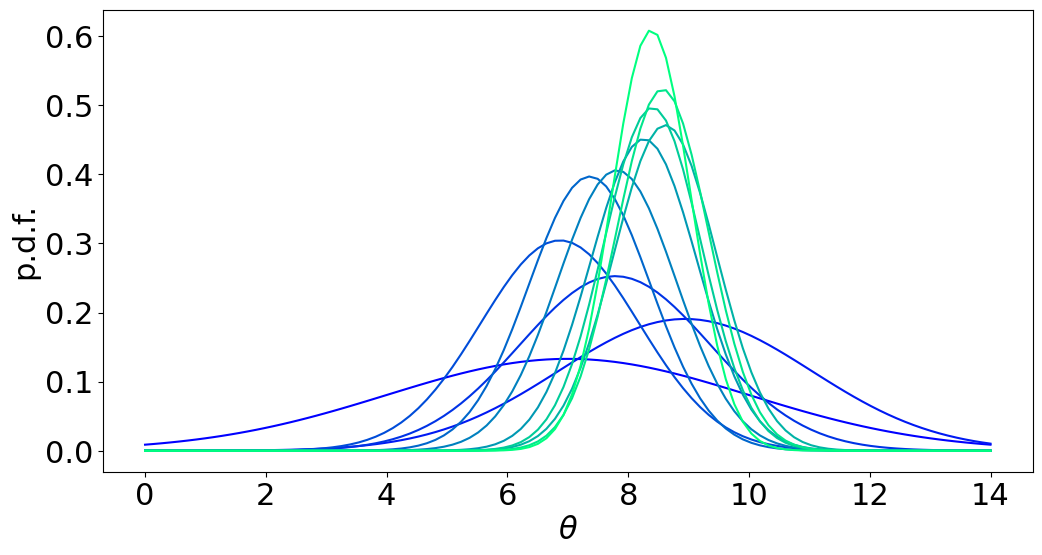

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.colors as colors
import matplotlib.cm as cmx


matplotlib.rcParams.update({'font.size': 22})
cmap = plt.get_cmap('winter')
cNorm  = colors.Normalize(vmin=0, vmax=len(history)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plt.figure(figsize=(12, 6))
x = np.linspace(0, 14, 100)
for idx, (mean, sd) in enumerate(history):
    color = scalarMap.to_rgba(idx)
    y = norm.pdf(x, mean, sd)
    plt.plot(x, y, color=color)
    plt.xlabel("$\\theta$")
    plt.ylabel("p.d.f.")
plt.show()

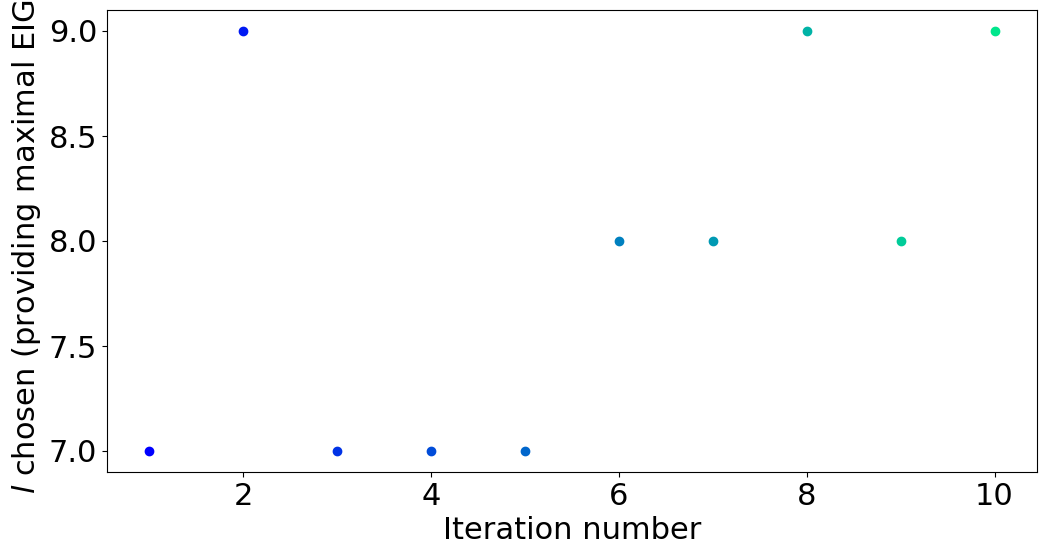

In [41]:
matplotlib.rcParams.update({'font.size': 22})
cmap = plt.get_cmap('winter')
cNorm  = colors.Normalize(vmin=0, vmax=len(history)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plt.figure(figsize=(12, 6))

for idx, eig in enumerate(eigs):
    color = scalarMap.to_rgba(idx)
    l_chosen = eig.argmax().item() + 1
    plt.scatter(idx+1, l_chosen, color=color)
    plt.ylabel("$l$ chosen (providing maximal EIG)")
    plt.xlabel("Iteration number")

plt.show()

## Summary of Section 2: Experiment Design

The main points we want to emphasise about this section are
* Models can be used to make experiments more efficient and/or cheaper.
* This is a very active area of research with the potential to transform protein design and possibly many other areas of research.



---



---



# **Section 3**

# Towards more complex models

If you have made it this far, then congratulations! You have covered a lot of ground today.

A beautiful aspect of Bayesian modelling, combined with probabilistic programming, is that we have a unified framework for working with both simple models, such as the coin flipping example, and more complex models, such as those needed to analyse and design experiments, or those encountered in the context of deep learning. In this section we will start to dabble in more complex problems but first, we need to introduce two more concept -- the use of plates and hierarchical models.

## Plate notation

Representing each observation as a separate node is a bit inefficient. Going back to the coin example above we have

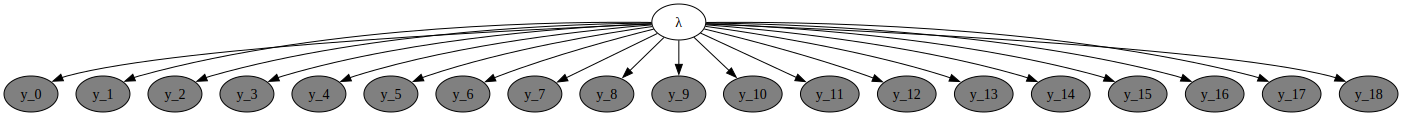

In [42]:
pyro.clear_param_store()

def model(data):
    # define the hyperparameters that control the Beta prior
    alpha0 = torch.tensor(10.0)
    beta0 = torch.tensor(10.0)
    # sample f from the Beta prior
    f = pyro.sample("λ", dist.Beta(alpha0, beta0))
    # loop over the observed data
    for i in range(len(data)):
        # observe datapoint i using the bernoulli likelihood
        pyro.sample("y_{}".format(i), dist.Bernoulli(f), obs=data[i])
        
pyro.render_model(model, model_args=(data,))

Since it is common to have many variables that are independent and identically distributed, there is a special notation used in order to simplify the DAG, and Pyro code, which is called a plate. An equivalent way of representing this model is as follows

In [43]:
def model_v2(data):
    # define the hyperparameters that control the Beta prior
    alpha0 = torch.tensor(10.0)
    beta0 = torch.tensor(10.0)
    # sample f from the Beta prior
    f = pyro.sample("λ", dist.Beta(alpha0, beta0))
    # loop over the observed data

   # for i in range(len(data)):
   #     # observe datapoint i using the bernoulli likelihood
   #     pyro.sample("obs_{}".format(i), dist.Bernoulli(f), obs=data[i])

   #Replace the loop we had previously with a plate
    with pyro.plate("N", len(data)):
      pyro.sample("y", dist.Bernoulli(f), obs=data)

and now the DAG looks like this:

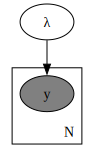

In [44]:
pyro.render_model(model_v2, model_args=(torch.tensor(data),))

Where $N$ represents the number of observations. So in this case $N = 10$. In Pyro plates can be used to informs inference algorithms that the variables being indexed are conditionally independent.

## Hierarchical Modelling

The use of priors in Bayesian modelling, the use of probabilistic programming, the use of DAGs as a way to visualise models,...everything we have discuessed thus far, all start to show their true value when we consider models with a rich structure of dependencies between variables.

Hierarchical modeling is used to model complex data structures that exhibit hierarchy or nested structure. It's particularly useful when you have data that can be naturally organized into groups or levels, and you want to estimate parameters at each level while accounting for the variability both within and between groups.

Another way to think about hierarchical modelling is as an information sharing mechanism between subgroups. i.e. You might have collections of data that are distinct but have some common properties. In this case you can use hierarchical modelling as a way to learn those common features, while also providing the freedom for each group to differ. It can also be a very effective way of avoiding certain types of overfitting, since hierarchical structure can be thought of as learning an informative prior for each subgroup.

### Predicting the Progresson of Pulmonary Fibrosis with Bayesian Hierarchical Linear Regression

This section is adapted from [the tutorial by Carlos Souza](https://num.pyro.ai/en/stable/tutorials/bayesian_hierarchical_linear_regression.html).

Here we use NumPyro. It is less mature than the Pyro, but is blazing fast for MCMC computations. It uses JAX, rather than PyTorch as a backend.

#### Understanding the task
Pulmonary fibrosis is a disorder with no known cause and no known cure, created by scarring of the lungs. The goal of this section is to predict a patient’s severity of decline in lung function. Lung function is assessed based on output from a spirometer, which measures the forced vital capacity (FVC), i.e. the volume of air exhaled.

Let's explore the data

In [45]:
%pip install -q numpyro arviz seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpyro
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.distributions as dist
from jax import random

In [47]:
train = pd.read_csv(
    "https://gist.githubusercontent.com/ucals/"
    "2cf9d101992cb1b78c2cdd6e3bac6a4b/raw/"
    "43034c39052dcf97d4b894d2ec1bc3f90f3623d9/"
    "osic_pulmonary_fibrosis.csv"
)
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In the dataset, we were provided with a baseline chest CT scan and associated clinical information for a set of patients. A patient has an image acquired at time Week = 0 and has numerous follow up visits over the course of approximately 1-2 years, at which time their FVC is measured. For this example, we will use only the Patient ID, the weeks and the FVC measurements, discarding all the rest.

Since this is real medical data, the relative timing of FVC measurements varies widely, as shown in the 3 sample patients below:

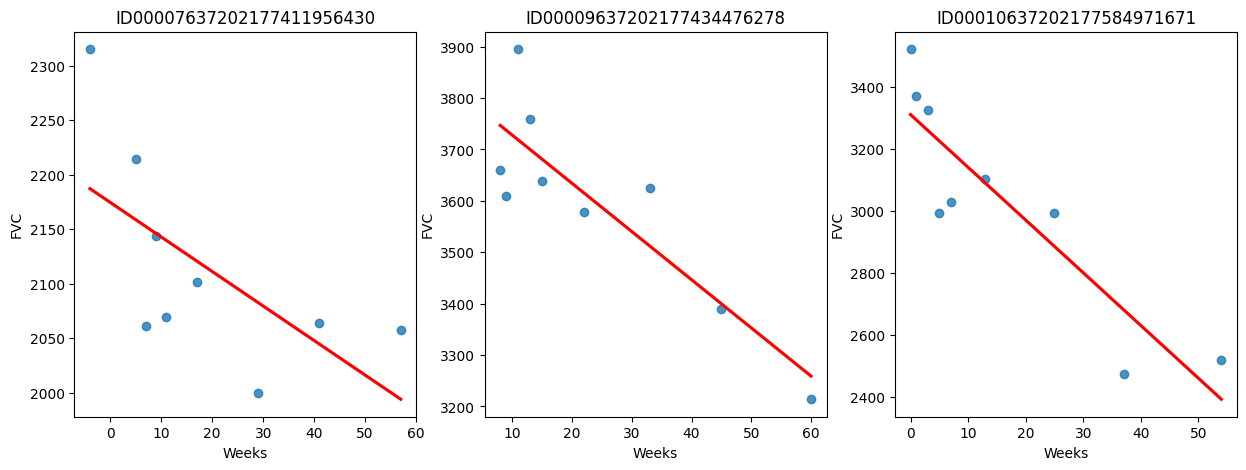

In [48]:
# Reset plotting parameters
plt.rcdefaults()
sns.reset_defaults()

def chart_patient(patient_id, ax):
    data = train[train["Patient"] == patient_id]
    x = data["Weeks"]
    y = data["FVC"]
    ax.set_title(patient_id)
    sns.regplot(x=x, y=y, ax=ax, ci=None, line_kws={"color": "red"})

f, axes = plt.subplots(1, 3, figsize=(15, 5))
chart_patient("ID00007637202177411956430", axes[0])
chart_patient("ID00009637202177434476278", axes[1])
chart_patient("ID00010637202177584971671", axes[2])
plt.show()

On average, each of the 176 provided patients made 9 visits, when FVC was measured. The visits happened in specific weeks in the [-12, 133] interval. The decline in lung capacity is very clear. We see, though, they are very different from patient to patient. We will predict every patient's FVC measurement for every possible week in the [-12, 133] interval, and the confidence for each prediction.

Before moving on to the next section try to complete the following exercise



#### Exercise 3.1
Before we make things more complicated, first let's imagine we have just one patient. We assume a linear relationship between FVC and time $t$
$${\rm FVC} = \beta t + \alpha$$
1. The above expression is missing the fact that our data is "noisy". Add a term to the above expression to account for noise.
2. Improve your model from 1 by turning it into a fully Bayesian generative story.
3. Draw the DAG for your model. Feel free to just draw it by hand but if you are feeling more ambitious, try coding up the model and using numpyro to render the dag.

#### Answers to Exercise 3.1
1. The above expression is missing the fact that our data is "noisy". Add a term to the above expression to account for noise.

**Answer**: A natural extension would be to add an explicit noise term
$${\rm FVC} = \beta t + \alpha + \epsilon$$
where $\epsilon$ could come from a centred Gaussian with standard deviation $\sigma$
$$\epsilon \sim N(0,\sigma),$$

**Note**:
An equivalent way of writing this is
$${\rm FVC} \sim N(\beta t + \alpha,\sigma)$$

2. Improve your model from 1 by turning it into a fully Bayesian generative story.

**Answer**: We could try something like the following
\begin{align}
\alpha &\sim \text{Normal}(\mu_{\alpha}, \sigma_{\alpha}) \\
\beta &\sim \text{Normal}(\mu_{\beta}, \sigma_{\beta}) \\
\sigma &\sim \text{Half-Normal}(100) \\
FVC_{ij} &\sim \text{Normal}(\alpha + t \beta, \sigma)
\end{align}

**Note**:
* The precise choice of prior does not matter. The point is just to write down a complete generative model.
* You just reinvented/rediscovered Bayesian linear regression.   

3. Draw the DAG for your model. Feel free to just draw it by hand but if you are feeling more ambitious, try coding up the model and using numpyro to render the dag.

**Answer**: Its the same as the lower part of the diagram below.

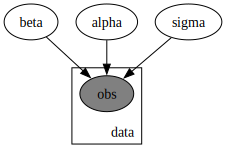

In [49]:
# A really over the top way of making the DAG is to code up the model.

def bayesian_linear_regression_model(x, y):
    # Priors for the regression coefficients
    beta = numpyro.sample("beta", dist.Normal(0, 1))
    alpha = numpyro.sample("alpha", dist.Normal(0, 1))

    # Variance for the observations
    sigma = numpyro.sample("sigma", dist.HalfNormal(1))

    # Linear regression model
    with numpyro.plate("data", len(x)):
        y_mean = beta * x + alpha
        numpyro.sample("obs", dist.Normal(y_mean, sigma), obs=y)

# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100)
y = 2 * x + 1 + 0.1 * np.random.randn(100)

# Render the model using numpyro.render_model
numpyro.render_model(bayesian_linear_regression_model, model_args=(x, y))

#### Modelling: Bayesian Hierarchical Linear Regression with Partial Pooling
The simplest possible linear regression, not hierarchical, would assume all FVC decline curves have the same $\alpha$ and $\beta$. That's the **pooled model**. In the other extreme, we could assume a model where each patient has a personalized FVC decline curve, and **these curves are completely unrelated**. That's the **unpooled model**, where each patient has completely separate regressions.

Here, we go for the middle ground: **Partial pooling**. Specifically, we assume that while $\alpha$'s and $\beta$'s are different for each patient as in the unpooled case, **the coefficients all share similarity**. We can model this by assuming that each individual coefficient comes from a common group distribution. The image below represents this model graphically:

<img src="https://i.ibb.co/H7NgBfR/Artboard-2-2x-100.jpg" alt="drawing" width="600"/>

The model has the following generative story:

\begin{align}
\mu_{\alpha} &\sim \text{Normal}(0, 500) \\
\sigma_{\alpha} &\sim \text{Half-Normal}(100) \\
\mu_{\beta} &\sim \text{Normal}(0, 3) \\
\sigma_{\beta} &\sim \text{Half-Normal}(3) \\
\alpha_i &\sim \text{Normal}(\mu_{\alpha}, \sigma_{\alpha}) \\
\beta_i &\sim \text{Normal}(\mu_{\beta}, \sigma_{\beta}) \\
\sigma &\sim \text{Half-Normal}(100) \\
FVC_{ij} &\sim \text{Normal}(\alpha_i + t \beta_i, \sigma)
\end{align}

where *t* is the time in weeks. Those are very uninformative priors, but that's ok: our model will converge!



#### Exercise 3.2
1. Structurally (i.e. don't worry if you chose different priors for the $\sigma$ terms, or made different (hyper)parameter choices), can you see how this model is a simple extension of the model from Exercise 1?

2. Imagine the FVC data for every patient is identical. What would the model infer for each of the parameters?

#### Answers to Exercise 3.2
1. Structurally (i.e. don't worry if you chose different priors for the $\sigma$ terms, or made different (hyper)parameter choices), can you see how this model is a simple extension of the model from Exercise 1?

**Answer**: Exercise 1.1 basically gives us the lower part of this generative story. We had
\begin{align}
\alpha &\sim \text{Normal}(\mu_{\alpha}, \sigma_{\alpha}) \\
\beta &\sim \text{Normal}(\mu_{\beta}, \sigma_{\beta}) \\
\sigma &\sim \text{Half-Normal}(100) \\
FVC_{ij} &\sim \text{Normal}(\alpha + t \beta, \sigma)
\end{align}
The only difference now is that the parameters of all the distributions here are themselves drawn from another set of distibutions. We then allow for each patient to be a distinct sample from those distributions.

**Note**: In principle there is nothing to stop you making the highest level (hyperparmaters) come from another set of distributions. In this sense Bayesian modelling has a bit of a "Turtles all the way down" situation going on.

2. Imagine the FVC data for every patient is identical. What would the model infer for each of the parameters?

**Answer**: The model should reduce back to vanilla Bayesian linear regression. More precisely
* $\alpha_{i} = \alpha_{k} = \mu_{\alpha} $, $\forall$ $i$, $k$, (where $i$, $k$ index the patients).
* $\beta_{i} = \beta_{k} = \mu_{\beta}$ $\forall$ $i$, $k$
* $\sigma_{\alpha} = \sigma_{\beta} = 0$
* The rest of the parameters will depend on the data.

Implementing this model in NumPyro can be done as follows

In [50]:
def model(patient_code, Weeks, FVC_obs=None):
    # Prior distributions for global model parameters
    μ_α = numpyro.sample("μ_α", dist.Normal(0.0, 500.0))
    σ_α = numpyro.sample("σ_α", dist.HalfNormal(100.0))
    μ_β = numpyro.sample("μ_β", dist.Normal(0.0, 3.0))
    σ_β = numpyro.sample("σ_β", dist.HalfNormal(3.0))

    # Calculate the number of unique patients
    n_patients = len(np.unique(patient_code))

    # Hierarchical model for patient-specific parameters (α and β)
    with numpyro.plate("plate_i", n_patients):
        α = numpyro.sample("α", dist.Normal(μ_α, σ_α))
        β = numpyro.sample("β", dist.Normal(μ_β, σ_β))

    # Prior distribution for residual standard deviation
    σ = numpyro.sample("σ", dist.HalfNormal(100.0))

    # Calculate the estimated FVC values for each patient and week
    FVC_est = α[patient_code] + β[patient_code] * Weeks

    # Likelihood model for observed FVC values
    with numpyro.plate("data", len(patient_code)):
        numpyro.sample("obs", dist.Normal(FVC_est, σ), obs=FVC_obs)


#### Exercise 3.3
Comment every line of the model code above.

That's all for modelling!

#### Fitting the model
Before we perform inference, let's add a numerical Patient ID for each patient code. That can be done with scikit-learn's LabelEncoder:

In [51]:
from sklearn.preprocessing import LabelEncoder
patient_encoder = LabelEncoder()
train["patient_code"] = patient_encoder.fit_transform(train["Patient"].values)
FVC_obs = train["FVC"].values
Weeks = train["Weeks"].values
patient_code = train["patient_code"].values

Now that we have the model and training data defined, we can check the DAG.

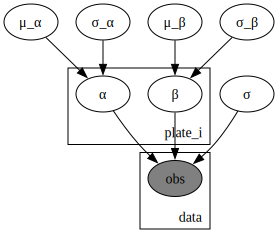

In [52]:
numpyro.render_model(model, model_args=(patient_code,Weeks,FVC_obs,))

And now, we perform inference by calling NumPyro's inference engine:

In [53]:
# Create a NUTS (No-U-Turn Sampler) kernel for MCMC sampling
nuts_kernel = NUTS(model)
# Choose how many warm up, and actual samples we will take
num_samples=2000
num_warmup=2000
# Create an MCMC (Markov Chain Monte Carlo) sampler with settings
mcmc = MCMC(nuts_kernel, num_samples=num_samples, num_warmup=num_warmup)
# Set a random number generator (RNG) key for reproducibility
rng_key = random.PRNGKey(1)
# Run the MCMC sampler to obtain posterior samples
mcmc.run(rng_key, patient_code, Weeks, FVC_obs=FVC_obs)
# Get the posterior samples from the MCMC run
posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 4000/4000 [01:24<00:00, 47.25it/s, 127 steps of size 2.46e-02. acc. prob=0.87] 


Further explanation of the above code for the dedicated reader:

The "kernel" and the "sampler" are closely related components in the context of Markov Chain Monte Carlo (MCMC) algorithms, but they serve different roles in the MCMC process:

Kernel: The kernel is responsible for proposing new states from the current state in the MCMC chain. It defines how the chain transitions from one state to another. The kernel specifies the proposal distribution and the acceptance criteria for new states.

Sampler: The sampler manages the overall MCMC process, including the iteration over a sequence of states.
It incorporates the kernel to generate new states, evaluate acceptance criteria, and update the state of the Markov chain.
The sampler controls the number of iterations, warm-up (burn-in) phase, and final sampling phase. It collects and stores the samples drawn from the Markov chain, representing the posterior distribution of model parameters.

In the code above, NUTS is the kernel that defines how the chain transitions between states, while MCMC is the sampler that manages the overall MCMC process and collects the posterior samples. The sampler uses the kernel as a component to generate the state transitions.

#### Checking the model
##### Inspecting the learned parameters
First, let's inspect the parameters learned. To do that, I will use [ArviZ](https://arviz-devs.github.io/arviz/), which integrates with NumPyro very nicely.

The following plots are standard ways of "eyeballing" the learning process that occured using MCMC. On the left we have the inferred posterior distributions and on the right we have the trace plots.

Trace plots are essential for assessing the convergence and mixing of the Markov Chain. There is one trace for each parameter in the model.

Notes on Interpretation:
* In general one looks for smooth and stable traces with minimal autocorrelation. A smooth trace means the chain has converged, and it's not stuck in one region.
* Check for any visual patterns or trends in the traces. For well-converged chains, you should not see oscillations or wild swings.

If this is your first time looking at a trace plot, then it might help to see some [examples of bad trace plots](https://jpreszler.rbind.io/post/2019-09-28-bad-traceplots/).

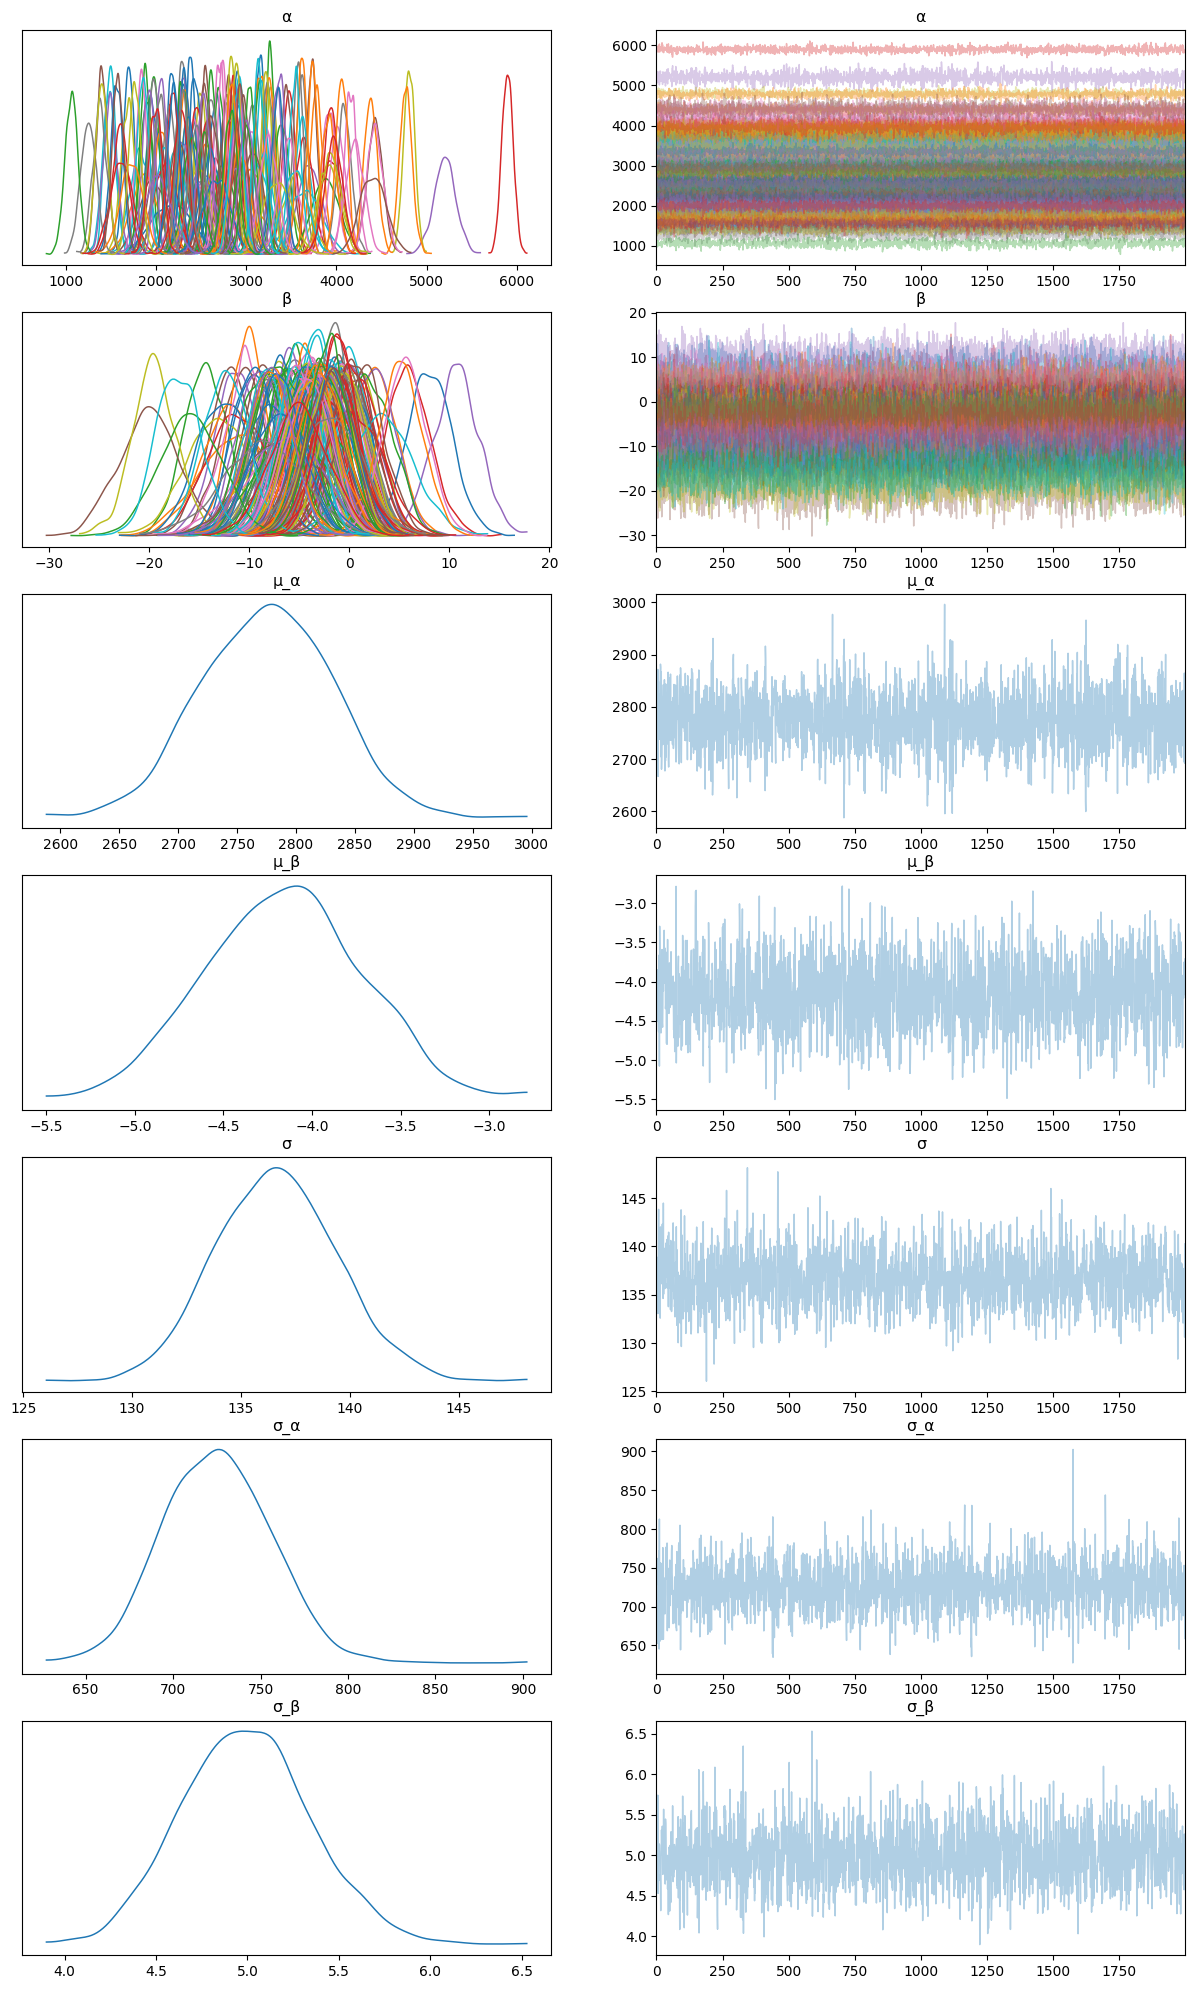

In [54]:
import arviz as az
data = az.from_numpyro(mcmc)
az.plot_trace(data, compact=True, figsize=(15, 25))
plt.show()

The main takeaway from these plots is that it looks like the model learned personalized alphas and betas for each patient!

#### Visualizing FVC decline curves for some patients
Now, let's visually inspect FVC decline curves predicted by our model. We will completely fill in the FVC table, predicting all missing values. These next few lines of code are not worth trying to follow in detail. **Feel free to skip to the plots!**

In [55]:
def create_prediction_template(unique_patient_df, weeks_series):
    unique_patient_df["_temp"] = True
    weeks = pd.DataFrame(weeks_series, columns=["Weeks"])
    weeks["_temp"] = True
    return unique_patient_df.merge(weeks, on="_temp").drop(["_temp"], axis=1)

In [56]:
patients = train[["Patient", "patient_code"]].drop_duplicates()
start_week_number = -12
end_week_number = 134
predict_weeks = pd.Series(np.arange(start_week_number, end_week_number))
pred_template = create_prediction_template(patients, predict_weeks)

Predicting the missing values in the FVC table and confidence (sigma) for each value becomes really easy:

In [57]:
patient_code = pred_template["patient_code"].values
Weeks = pred_template["Weeks"].values
predictive = Predictive(model, posterior_samples, return_sites=["σ", "obs"])
samples_predictive = predictive(random.PRNGKey(0), patient_code, Weeks, None)

Let's now put the predictions together with the true values, to visualize them:

In [58]:
df = pred_template.copy()
df["FVC_pred"] = samples_predictive["obs"].T.mean(axis=1)
df["sigma"] = samples_predictive["obs"].T.std(axis=1)
df["FVC_inf"] = df["FVC_pred"] - df["sigma"]
df["FVC_sup"] = df["FVC_pred"] + df["sigma"]
df = pd.merge(
    df, train[["Patient", "Weeks", "FVC"]], how="left", on=["Patient", "Weeks"]
)
df = df.rename(columns={"FVC": "FVC_true"})
df.head()

,Patient,patient_code,Weeks,FVC_pred,sigma,FVC_inf,FVC_sup,FVC_true
0,ID00007637202177411956430,0,-12,2226.497559,158.575714,2067.921875,2385.073242,NaN
1,ID00007637202177411956430,0,-11,2216.255127,158.235168,2058.020020,2374.490234,NaN
2,ID00007637202177411956430,0,-10,2219.166992,155.002930,2064.164062,2374.169922,NaN
3,ID00007637202177411956430,0,-9,2214.768555,152.264938,2062.503662,2367.033447,NaN
4,ID00007637202177411956430,0,-8,2208.648682,154.003647,2054.645020,2362.652344,NaN


Finally, let's see our predictions for 3 patients:

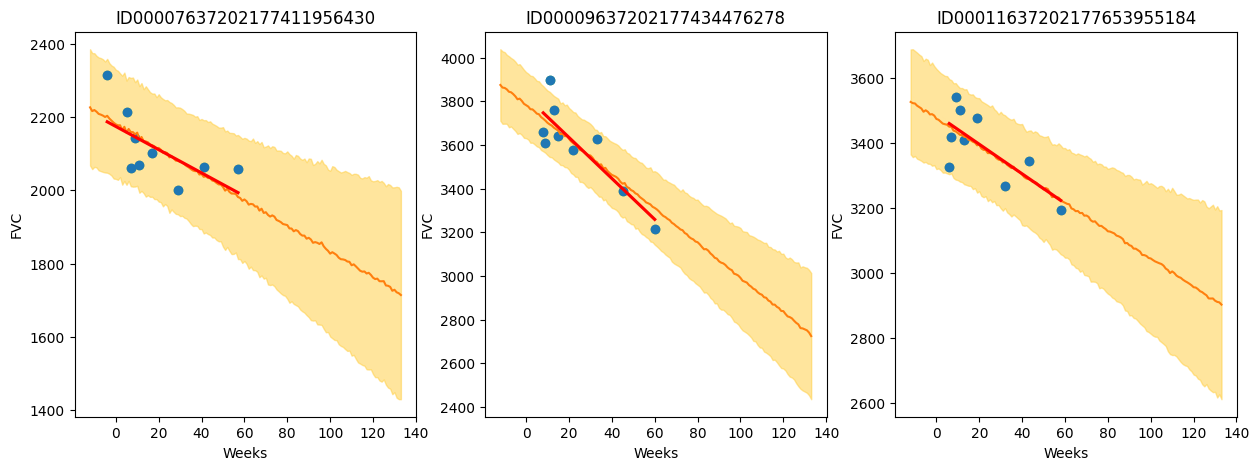

In [59]:
def chart_patient_with_predictions(patient_id, ax):
    data = df[df["Patient"] == patient_id]
    x = data["Weeks"]
    ax.set_title(patient_id)
    ax.plot(x, data["FVC_true"], "o")
    ax.plot(x, data["FVC_pred"])
    ax = sns.regplot(x=x, y=data["FVC_true"], ax=ax, ci=None, line_kws={"color": "red"})
    ax.fill_between(x, data["FVC_inf"], data["FVC_sup"], alpha=0.5, color="#ffcd3c")
    ax.set_ylabel("FVC")


f, axes = plt.subplots(1, 3, figsize=(15, 5))
chart_patient_with_predictions("ID00007637202177411956430", axes[0])
chart_patient_with_predictions("ID00009637202177434476278", axes[1])
chart_patient_with_predictions("ID00011637202177653955184", axes[2])
plt.show()

The results are exactly what we expected to see! Highlight observations:

* The model adequately learned Bayesian Linear Regressions! The orange line (learned predicted FVC mean) is very inline with the red line (deterministic linear regression). But most important: it learned to predict uncertainty, showed in the light orange region (one sigma above and below the mean FVC line).
* The model predicts a higher uncertainty where the data is more scattered (1st and 3rd patients). Conversely, where the points are closely grouped together (2nd patient), the model predicts a higher confidence (narrower light orange region)
* Finally, in all patients, we can see that the uncertainty grows as we extrapolate further from the data seen in training (later weeks).

## Summary for section 3: Hierarchical Modelling
* Hierarchical modelling is a flexible approach for enabling information to be shared accross sub-models.
* We looked at an example where the "sub-models" seek to predict the progression of a disease on an individual patient basis and made use of hierarchical modelling to enable information about features common to many patients to be shared between the models.
* We started to discuss how one can assess if the model training went well or not but a proper treatment is of this is beyond the scope of this one-day course. We will provide suggestions for further reading which cover this topic in detail.
* The example demonstrated a valuable property of Bayesian modelling, which is that these models naturally provide a measure of uncertainty. Modelling uncertainty is a very active area of research and viewed as critical to safe real world use of machine learning models.



---



---



# **Section 4**

# Final Remarks

Well done for making it to the end!!!

## Next steps
If you are interested in learning more about Bayesian modelling there are many amazing resources out there. Here is a list of resources and topics that you might want to look into in more detail if you are thinking about using these techniques in your own research.

### Topics

#### Big Topics
* Bayesian workflow. There are many resources out there on this topic. [Here is a recent review](https://arxiv.org/abs/2011.01808). [There is also this humungous tutorial](https://arxiv.org/abs/2011.01808)
* Bayesian Deep Learning (Bayesian variational autoencoders are a nice place to start)
* Information Geometry
* High-dimensional Probability
* Robust Inference
* Gaussian Processes
* Variational Inference
* Markov Chain Monte Carlo

#### Smaller topics
* Bayesian Model Comparison
* [Non-centered models](https://twiecki.io/blog/2017/02/08/bayesian-hierchical-non-centered/)
* [Maximum entropy models](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution)
* [The exponential family](https://en.wikipedia.org/wiki/Exponential_family)
* [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior)
* [Sparsity inducing priors](https://betanalpha.github.io/assets/case_studies/modeling_sparsity.html)
* [Derivation of the ELBO](https://en.wikipedia.org/wiki/Evidence_lower_bound)

### Books and lectures
pdfs of these books are all freely available online
* [Kevin Murphy - Probabilistic Machine Learning: An Introduction](https://probml.github.io/pml-book/book1.html)
* [Kevin Murphy - Probabilistic Machine Learning: Advanced Topics](https://probml.github.io/pml-book/book2.html)
* [Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin: Bayesian data analysis](https://stat.columbia.edu/~gelman/book/)
* [Richard McElreath: Statistical Rethinking (2023 Edition)](https://github.com/rmcelreath/stat_rethinking_2023#calendar--topical-outline) and here are [all chapters implemented in Pyro](https://fehiepsi.github.io/rethinking-pyro/)
* [Andrew Gordon Wilson - Bayesian Deep Learning and Probabilistic Model Construction - ICML 2020 Tutorial](https://youtu.be/E1qhGw8QxqY?si=fqeS48uFlCVP0Yul)
* [Jaynes - Probability Theory: The Logic of Science](https://bayes.wustl.edu/etj/prob/book.pdf)

### Some Inspiring People
* [Andrew Gordon Wilson](https://cims.nyu.edu/~andrewgw/)
* [Emtiyaz Khan](https://emtiyaz.github.io/)
* [David Duvenaud](https://www.cs.toronto.edu/~duvenaud/)
* [David Blei](https://www.cs.columbia.edu/~blei/)
* [Jacob Steinhardt](https://jsteinhardt.stat.berkeley.edu/)
* [Smita Krishnaswamy](https://krishnaswamylab.org/)
* [Max Welling](https://staff.fnwi.uva.nl/m.welling/)
* [Jennifer Listgarten](http://www.jennifer.listgarten.com/)
* [Zoubin Ghahramani](https://mlg.eng.cam.ac.uk/zoubin/)
* [Yee Whye Teh](https://www.stats.ox.ac.uk/~teh/)
* [Tamara Broderick](https://tamarabroderick.com/)
* [Jeff Miller](https://jwmi.github.io/)
* [Debora Marks](https://www.deboramarkslab.com/)



